# Heart Disease Prediction Guided Project

## 1. Introduction

This is a guided project from Dataquest's course "Introduction to Supervised Machine Learning in Python".

According to the World Health Organisation (WHO), an estimated 17.9 million people die each year from cardiovascular diseases. There are manifold risk factors that potentially contribute to cardiovascular diseases in a person, such as an unhealthy diet, lack of physical activity, and mental illness.

The [Kaggle dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction) in this project contains relevant information for each patient, including their personal information, some medical data, and whether they have had heart disease. The aim is to use this dataset to write a k-Nearest Neighbours machine learning model to accurately predict the likelihood of a new patient having heart disease in the future.

The dataset contains the following features:

1.	Age: age of the patient [years]
2.	Sex: sex of the patient [M: Male, F: Female]
3.	ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4.	RestingBP: resting blood pressure [mm Hg]
5.	Cholesterol: serum cholesterol [mm/dl]
6.	FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7.	RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8.	MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9.	ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10.	Oldpeak: oldpeak = ST [Numeric value measured in depression]
11.	ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12.	HeartDisease: output class [1: heart disease, 0: Normal]


In [98]:
# Import relevant libraries for the project.
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [99]:
# Read the data into a dataframe.
heart_disease_df = pd.read_csv('heart_disease_prediction.csv')

In [100]:
# Display the first 5 rows of the dataframe.
heart_disease_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [101]:
# Check the number of features and observations in the dataset.
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


There are 918 rows and 12 columns in total.

In [102]:
heart_disease_df.dtypes.value_counts()

int64      6
object     5
float64    1
dtype: int64

There are 7 numerical and 5 categorical features, but FastingBS and HeartDisease are in fact categorical features.

## 2. EDA: Descriptive Statistics

In [103]:
# Display the descriptive statistics for heart_disease_df.
heart_disease_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


The average age of the patients is 53, with a standard deviation of 9.4. RestingBP and Cholesterol have a minimum value of 0, which doesn't seem right.

In [104]:
# Note that FastingBS and HeartDisease are categorical columns,
# as the following lines reveal:
heart_disease_df['FastingBS'].unique()

array([0, 1])

In [105]:
heart_disease_df['HeartDisease'].unique()

array([0, 1])

In [106]:
# Have a look at the descriptive statistics for the other categorical columns.
heart_disease_df.describe(include=['object'])

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [107]:
# Check for missing values.
heart_disease_df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

There are no missing values.

## 3. EDA: Visualizations

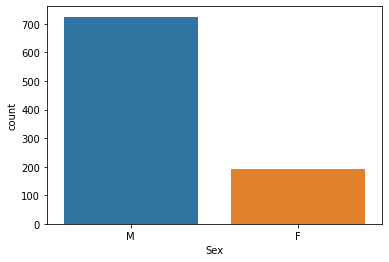

<Figure size 432x288 with 0 Axes>

In [108]:
ax = sns.countplot(x="Sex", data=heart_disease_df)
plt.show()
plt.clf()

The dataset is dominated by Male patients.

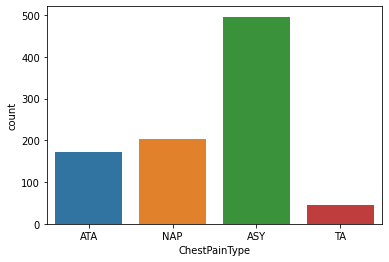

<Figure size 432x288 with 0 Axes>

In [109]:
sns.countplot(x="ChestPainType", data=heart_disease_df)
plt.show()
plt.clf()

The 'ASY' (Asymptomatic) category is the highest for the various chest pain types.

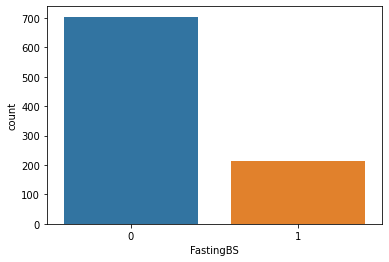

<Figure size 432x288 with 0 Axes>

In [110]:
sns.countplot(x="FastingBS", data=heart_disease_df)
plt.show()
plt.clf()

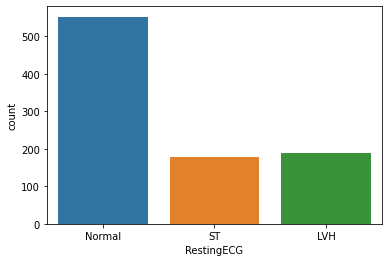

<Figure size 432x288 with 0 Axes>

In [111]:
sns.countplot(x="RestingECG", data=heart_disease_df)
plt.show()
plt.clf()

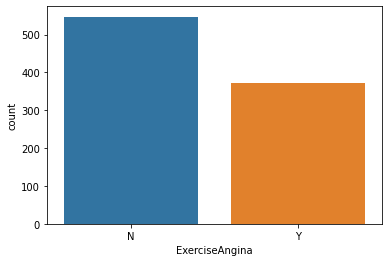

<Figure size 432x288 with 0 Axes>

In [112]:
sns.countplot(x="ExerciseAngina", data=heart_disease_df)
plt.show()
plt.clf()

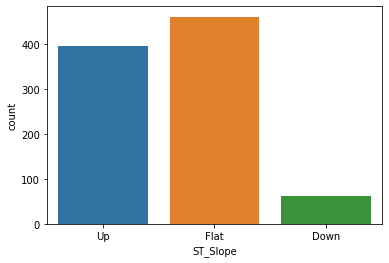

<Figure size 432x288 with 0 Axes>

In [113]:
sns.countplot(x="ST_Slope", data=heart_disease_df)
plt.show()
plt.clf()

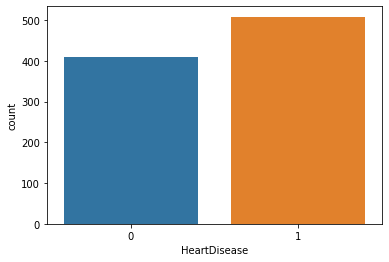

<Figure size 432x288 with 0 Axes>

In [114]:
sns.countplot(x="HeartDisease", data=heart_disease_df)
plt.show()
plt.clf()

### For every categorical column in the dataset , create a bar chart that displays the number of rows for each category of that column, grouped by 'HeartDisease'.

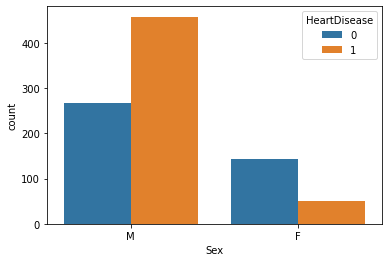

<Figure size 432x288 with 0 Axes>

In [115]:
ax = sns.countplot(x="Sex", data=heart_disease_df, hue="HeartDisease")
plt.show()
plt.clf()

As noted above, the data appears heavily skewed towards Male patients. The number of Male patients with heart disease dwarfs the corresponding category for Female patients.

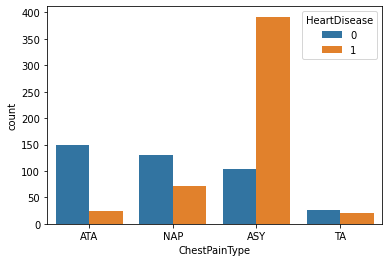

<Figure size 432x288 with 0 Axes>

In [116]:
sns.countplot(x="ChestPainType", data=heart_disease_df, hue="HeartDisease")
plt.show()
plt.clf()

A very high number of patients with heart disease were 'ASY' (Asymptomatic), meaning that they did not have chest pain as a symptom, so ChestPainType is probably not a good feature to use in our model.

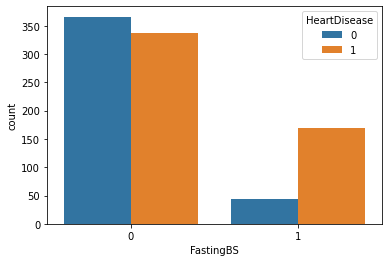

<Figure size 432x288 with 0 Axes>

In [117]:
sns.countplot(x="FastingBS", data=heart_disease_df, hue="HeartDisease")
plt.show()
plt.clf()

Of the people who were diagnosed with heart disease, a high number had a fasting blood suger greater than 120 mg/dl.

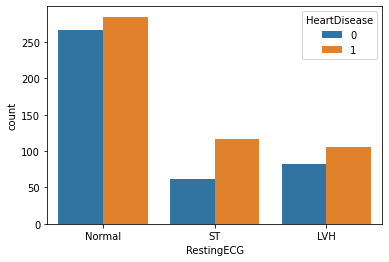

<Figure size 432x288 with 0 Axes>

In [118]:
sns.countplot(x="RestingECG", data=heart_disease_df, hue="HeartDisease")
plt.show()
plt.clf()

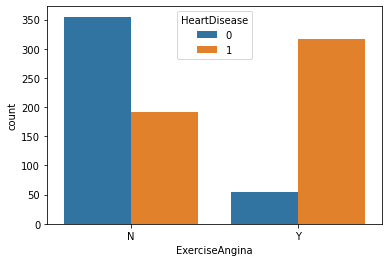

<Figure size 432x288 with 0 Axes>

In [119]:
sns.countplot(x="ExerciseAngina", data=heart_disease_df, hue="HeartDisease")
plt.show()
plt.clf()

For the group with excercise-induced angina, a much higher number of patients were diagnosed with heart disease.

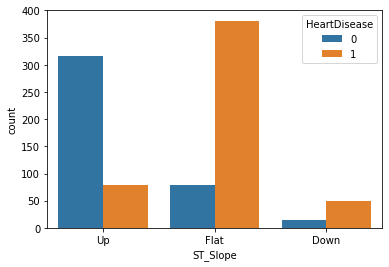

<Figure size 432x288 with 0 Axes>

In [120]:
sns.countplot(x="ST_Slope", data=heart_disease_df, hue="HeartDisease")
plt.show()
plt.clf()

### Optional explorations

#### Find the percentage of patients with heart disease who are male and over 50 years old.

In [121]:
heart_disease = heart_disease_df[heart_disease_df['HeartDisease'] == 1].copy()

In [122]:
# Calculate the total number of patients with heart disease.
heart_disease_count = heart_disease.shape[0]
print(f"The total number of patients with heart disease is: {heart_disease_count}.")

The total number of patients with heart disease is: 508.


In [123]:
# Calculate the number of male patients over 50 with heart disease.
male_over_50 = heart_disease[(heart_disease['Sex'] == 'M') & (heart_disease['Age'] > 50)]
male_over_50_count = male_over_50.shape[0]
print(f"The total number of male patients over 50 with heart disease is: {male_over_50_count}.")

The total number of male patients over 50 with heart disease is: 344.


In [124]:
percentage = male_over_50_count / heart_disease_count * 100
print(f"The percentage of patients with heart disease who are male and over 50 years old is: {percentage: .1f}%.")

The percentage of patients with heart disease who are male and over 50 years old is:  67.7%.


#### Find the median age of patients who were diagnosed with heart disease.

In [125]:
median_age = heart_disease['Age'].median()
print(f"The median age of patients who were diagnosed with heart disease is: {median_age:.0f}.")

The median age of patients who were diagnosed with heart disease is: 57.


## Data Cleaning

We saw above that RestingBP and Cholesterol have values of 0 that didn't seem quite right. We will deal with this issue hear.

In [128]:
# Count the number of rows that have a value of 0 for RestingBP.
zero_RestingBP = len(heart_disease_df[heart_disease_df['RestingBP'] == 0])
print(f"The number of rows with a value of 0 for RestingBP: {zero_RestingBP}.")

The number of rows with a value of 0 for RestingBP: 1.


In [129]:
# Count the number of rows that have a value of 0 for Cholesterol.
zero_Cholesterol = len(heart_disease_df[heart_disease_df['Cholesterol'] == 0])
print(f"The number of rows with a value of 0 for RestingBP: {zero_Cholesterol}.")

The number of rows with a value of 0 for RestingBP: 172.


For the columns RestingBP and Cholesterol, we will impute the zero values with the respective column medians.